In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.impute import SimpleImputer
import sklearn.metrics as skmet

In [ ]:
df = pd.read_csv("mnist/mnist_test.csv")

In [ ]:
df.shape

(9165, 785)

In [ ]:
df.tail()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
9160,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9161,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9162,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9163,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9164,7,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,9165.000000,9165.0,9165.0,9165.0,9165.0,9165.0,9165.0,9165.0,9165.0,9165.0,...,9164.000000,9164.000000,9164.000000,9164.000000,9164.0,9164.0,9164.0,9164.0,9164.0,9164.0
mean,4.447463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.195657,0.178525,0.057399,0.000655,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.927075,5.991809,2.527936,0.062677,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dig = [0,1,2,3,4,5,6,7,8,9]
num = []
for i in range(0,10):
    num.append(len(df[df['label']==i]))

d = {'Digit': dig, 'Count': num}
df1 = pd.DataFrame(data=d)
df1

,Digit,Count
0,0,892
1,1,1037
2,2,952
3,3,924
4,4,905
5,5,820
6,6,876
7,7,932
8,8,895
9,9,932


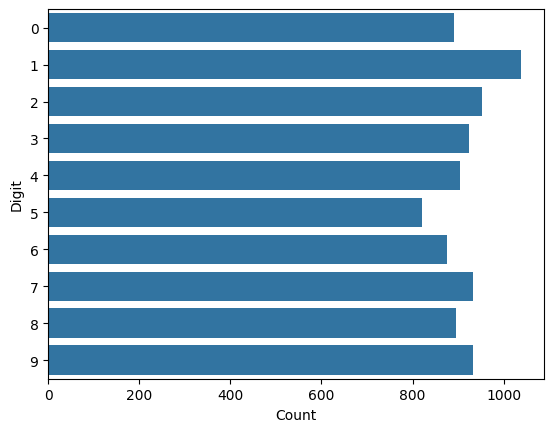

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = "Count", y = "Digit", data = df1, orient='h')
plt.show()

In [ ]:
df[df['label']==7].head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


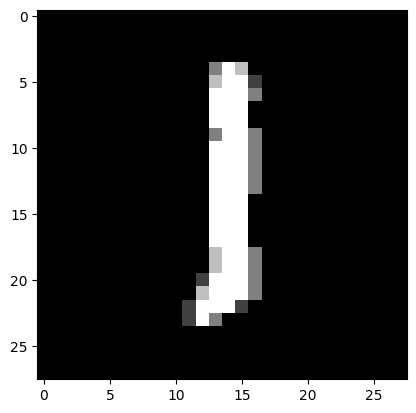

In [ ]:
pic = df[14:15].values.reshape(785)[1:].reshape(28,28)
plt.imshow(pic,cmap='gray')

In [ ]:
df[df['label']==9].head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
7,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


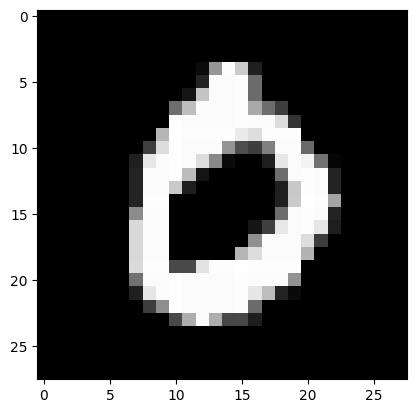

In [ ]:
pic = df[3:4].values.reshape(785)[1:].reshape(28,28)
plt.imshow(pic,cmap='gray')

In [ ]:
import sklearn.model_selection as skmodel
X = df.drop(['label'],axis=1)
X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = df.label
y.head()

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

In [ ]:
import sklearn.model_selection as skmodel
X_train, X_test, y_train, y_test = skmodel.train_test_split(X, y, test_size=0.33, random_state=42)
print("length of all data is ","{:,}".format(len(X)))
print("length of training set is","{:,}".format(len(X_train)))
print("length of test set is","{:,}".format(len(X_test)))

length of all data is  9,165
length of training set is 6,140
length of test set is 3,025


In [ ]:
import sklearn.neural_network as sknet
model = sknet.MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
model.fit(X_train,y_train)

MLPClassifier(random_state=42)

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
print("Accuracy on training set: {:.2%}".format(model.score(X_train_imputed, y_train)))
print("Accuracy on test set: {:.2%}".format(model.score(X_test_imputed, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Accuracy on training set: 99.82%
Accuracy on test set: 90.84%


In [ ]:
X_test_imputed = imputer.transform(X_test)

In [ ]:
y_pred = model.predict(X_test_imputed)
y_pred[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([9, 4, 6, 9, 3, 5, 1, 1, 6, 7])

In [ ]:
y_test[:10].values

array([9, 4, 6, 9, 3, 5, 1, 1, 8, 7])

In [ ]:
d = {'true': y_test, 'predicted': y_pred}
df_mlp = pd.DataFrame(data=d)
df_mlp['diff'] = df_mlp['predicted']-df_mlp['true']
df_mlp

,true,predicted,diff
733,9,9,0
1862,4,4,0
2057,6,6,0
1322,9,9,0
5814,3,3,0
...,...,...,...
5885,5,5,0
8444,5,5,0
3872,9,9,0
5974,0,0,0


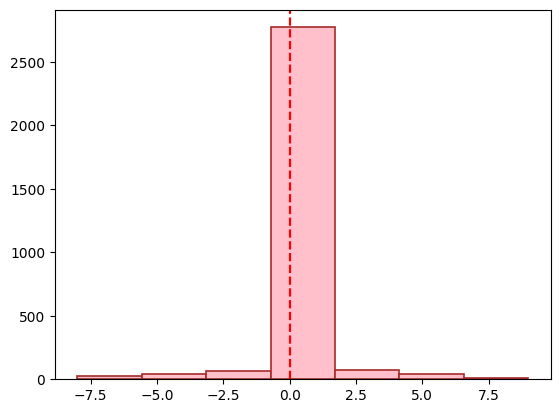

In [ ]:
plt.hist(df_mlp['diff'], bins=7, color='pink', edgecolor='brown', linewidth=1.2)
plt.axvline(0, color='red', linestyle='dashed', linewidth=1.6)
plt.show()

In [ ]:
pd.DataFrame({'Count': [(df_mlp['diff']<0).sum(), (df_mlp['diff']==0).sum(), (df_mlp['diff']>0).sum()]}, columns=['Count'], index=['Smaller', 'Zero', 'Larger'])

,Count
Smaller,130
Zero,2748
Larger,147


Confusion matrix, without normalization
[[264   0   2   0   0   8   2   0   4   2]
 [  0 306   2   6   0   0   2   2   1   1]
 [  4   3 301   7   4   1   4   7   1   1]
 [  1   1   4 296   3  10   0   6   5   4]
 [  3   0   0   1 292   2   7   9   2   9]
 [  3   0   1   3   2 212   5   4   7   2]
 [  6   0   5   0   2   6 272   0   1   1]
 [  0   6   3   0   1   0   1 292   1   7]
 [  2   5   4   5   5  10   5  11 236   5]
 [  0   0   0   1   8   6   0   8   4 277]]


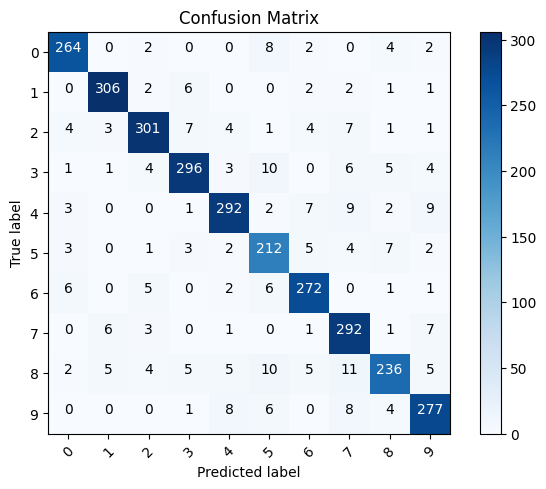

In [ ]:
import sklearn.metrics as skmet
cm = skmet.confusion_matrix(y_true=y_test, y_pred=y_pred)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm.sum()-(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9])),"incorrect predictions.")
print("\033[1m We have total predictions of: ",(cm.sum()))

 The result is telling us that we have:  2748 correct predictions.
 The result is telling us that we have:  277 incorrect predictions.
 We have total predictions of:  3025


In [ ]:

print(skmet.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       282
           1       0.95      0.96      0.95       320
           2       0.93      0.90      0.92       333
           3       0.93      0.90      0.91       330
           4       0.92      0.90      0.91       325
           5       0.83      0.89      0.86       239
           6       0.91      0.93      0.92       293
           7       0.86      0.94      0.90       311
           8       0.90      0.82      0.86       288
           9       0.90      0.91      0.90       304

    accuracy                           0.91      3025
   macro avg       0.91      0.91      0.91      3025
weighted avg       0.91      0.91      0.91      3025



In [ ]:
import random
i = int(random.randint(0,59998))
print(i)


21880


In [ ]:
import random

# Generate a random index
i = random.randint(0, 59998)

# Access the random row from the DataFrame
selected_row = df[i:i+1]

# Check if the selected row is not empty
if not selected_row.empty:
    # Retrieve values and reshape into 28x28 image
    row_values = selected_row.values
    # Check if row_values has expected shape
    if row_values.shape == (1, 785):  # Assuming each row should have 785 elements
        image_pixels = row_values[0, 1:].reshape(28, 28)
        # Now you can use image_pixels for further processing or visualization
        print("Image shape:", image_pixels.shape)
    else:
        print("Selected row does not have 785 elements:", row_values.shape)
else:
    print("Selected row is empty")


Selected row is empty


In [ ]:
model.predict(new_pic.reshape(1,784))[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


7

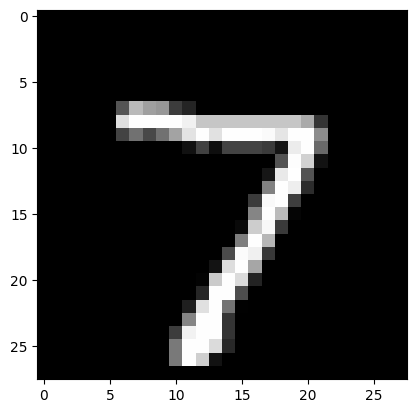

In [ ]:
plt.imshow(new_pic, cmap='gray')